# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Stephen Miller

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy
import matplotlib.pyplot as plt
import re
from textblob import TextBlob



#In this project, I will be reviewing MLK Jr's I Have a Dream speech, found here:

#https://www.americanrhetoric.com/speeches/mlkihaveadream.htm




2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
#set URL and filename to push HTML info
url = "https://www.marshall.edu/onemarshallu/i-have-a-dream/"

#access data
response = requests.get(url)

html_info = response.text

# Parse the HTML info using BeautifulSoup
soup = BeautifulSoup(html_info, 'html.parser')

article_content = soup.find("div", class_="entry-content")

# Extract and print the data cleanly
text = article_content.get_text(strip = True, separator = "\n")
#print(text)

# Regular expression to remove text within parentheses () and brackets [],  because we don't want audience exclamations
cleaned_text = re.sub(r"\([^()]*\)|\[[^\[\]]*\]", "", text)

# Print the cleaned text
print(cleaned_text.strip())  # .strip() to remove extra spaces or line breaks


“I Have A Dream” Speech by Dr. Martin Luther King, Jr.
March on Washington for Jobs and Freedom
August 28, 1963
Speech Transcript
I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. 
Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves   who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. 
But one hundred years later , the Negro still is not free.  One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination.  One hundred years later , the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later  , the Negro is still languished in the corners

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(cleaned_text)

# Filter tokens: exclude punctuation, stopwords, and whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common = token_freq.most_common(5)

# Print the results
print("Most Frequent Tokens:")
for token, freq in most_common:
    print(f"Token: {token}, Frequency: {freq}")

Most Frequent Tokens:
Token: freedom, Frequency: 21
Token: negro, Frequency: 15
Token: let, Frequency: 13
Token: dream, Frequency: 12
Token: day, Frequency: 12


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
# Filter tokens: exclude punctuation, stopwords, and whitespace
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common = lemma_freq.most_common(5)

# Print the results
print("Most Frequent Lemmas:")
for lemma, freq in most_common:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most Frequent Lemmas:
Lemma: freedom, Frequency: 21
Lemma: negro, Frequency: 15
Lemma: let, Frequency: 13
Lemma: dream, Frequency: 12
Lemma: come, Frequency: 12


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

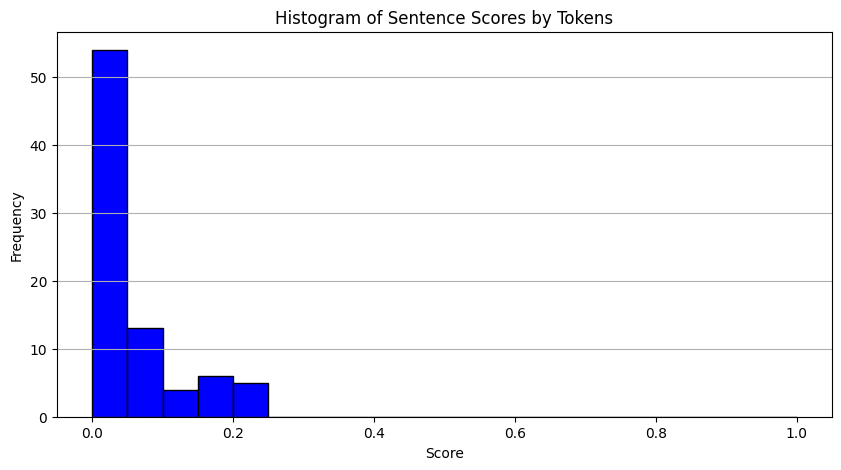

In [5]:
def score_sentence_by_token(sentence, interesting_tokens):
    #scored a sentence by the presense of interesting tokens
    
    #Ignores punctuation
    tokens = [token.text.lower() for token in sentence if not token.is_punct]
    if not tokens:
        return 0.0
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens)


import matplotlib.pyplot as plt

# Determine the most frequent tokens and lemmas
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
token_freq = Counter(tokens)
interesting_tokens = [token for token, _ in token_freq.most_common(5)]

scores_by_token = [score_sentence_by_token(sentence, interesting_tokens) for sentence in doc.sents]

# Plot histogram for token-based scores
plt.figure(figsize=(10, 5))
plt.hist(scores_by_token, bins=20, range=(0.0, 1.0), color='blue', edgecolor='black')
plt.title("Histogram of Sentence Scores by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

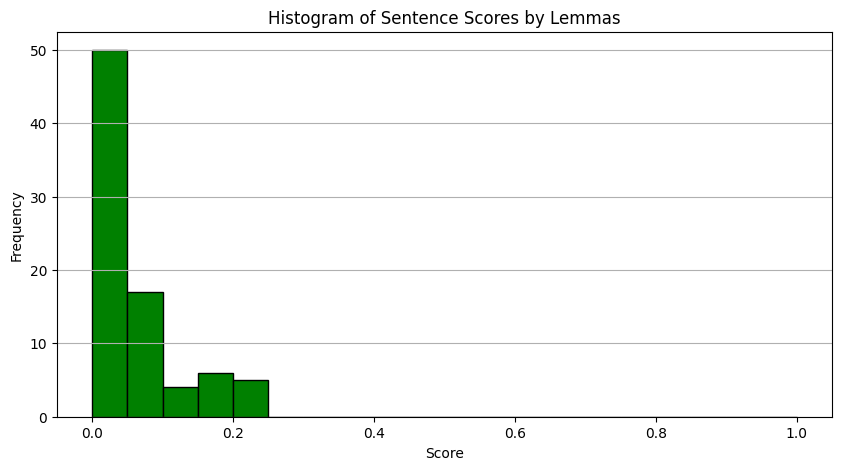

In [6]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    #Scores a sentence by the presence of interesting lemmas.

    #Ignores punctuation
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct]
    if not lemmas:
        return 0.0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
lemma_freq = Counter(lemmas)
interesting_lemmas = [lemma for lemma, _ in lemma_freq.most_common(5)]
    

scores_by_lemma = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents]

# Plot histogram for lemma-based scores
plt.figure(figsize=(10, 5))
plt.hist(scores_by_lemma, bins=20, range=(0.0, 1.0), color='green', edgecolor='black')
plt.title("Histogram of Sentence Scores by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.08
* Cutoff Score (lemmas): 0.08

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
# Define the cutoff score (e.g., average score or manually chosen threshold)
cutoff_score = 0.08

# Generate summary
summary_sentences = [
    sent.text.strip()
    for sent in doc.sents
    if score_sentence_by_token(sent, interesting_tokens) > cutoff_score
]

# Combine the sentences into a single summary text
summary = ' '.join(summary_sentences)

# Print the summary
print("Summary:")
print(summary)


Summary:
But one hundred years later , the Negro still is not free. This sweltering summer of the Negro’s legitimate discontent  will not pass until there is an invigorating autumn of freedom and equality. Let us not seek to satisfy our thirst for freedom by drinking from the cup of bitterness and hatred. Let us not wallow in the valley of despair. It is a dream deeply rooted in the American dream. I have a dream today. I have a dream today. Land where my fathers died, land of the pilgrim’s pride , from every mountainside, let freedom ring!” So let freedom ring  from the prodigious hilltops of New Hampshire. Let freedom ring from the mighty mountains of New York. Let freedom ring from the heightening Alleghenies of Pennsylvania. Let freedom ring  from the snow-capped Rockies of Colorado. Let freedom ring from the curvaceous slopes of California. But not only that:  Let freedom ring from Stone Mountain of Georgia. Let freedom ring from Lookout Mountain of Tennessee. Let freedom ring fro

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
# Compute the polarity score of the summary
blob = TextBlob(summary)
polarity_score = blob.sentiment.polarity

# Print the results
print(f"Polarity Score of the Summary: {polarity_score}")
print(f"Number of Sentences in the Summary: {len(summary_sentences)}")

Polarity Score of the Summary: 0.05909090909090909
Number of Sentences in the Summary: 17


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
# Define the cutoff score (e.g., average score or manually chosen threshold)
cutoff_score = 0.08

# Generate summary
summary_sentences = [
    sent.text.strip()
    for sent in doc.sents
    if score_sentence_by_lemma(sent, interesting_tokens) > cutoff_score
]

# Combine the sentences into a single summary text
summary = ' '.join(summary_sentences)

# Print the summary
print("Summary:")
print(summary)

Summary:
But one hundred years later , the Negro still is not free. This sweltering summer of the Negro’s legitimate discontent  will not pass until there is an invigorating autumn of freedom and equality. Let us not seek to satisfy our thirst for freedom by drinking from the cup of bitterness and hatred. Let us not wallow in the valley of despair. It is a dream deeply rooted in the American dream. I have a dream today. I have a dream today. Land where my fathers died, land of the pilgrim’s pride , from every mountainside, let freedom ring!” So let freedom ring  from the prodigious hilltops of New Hampshire. Let freedom ring from the mighty mountains of New York. Let freedom ring from the heightening Alleghenies of Pennsylvania. Let freedom ring  from the snow-capped Rockies of Colorado. Let freedom ring from the curvaceous slopes of California. But not only that:  Let freedom ring from Stone Mountain of Georgia. Let freedom ring from Lookout Mountain of Tennessee. Let freedom ring fro

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
# Compute the polarity score of the summary
blob = TextBlob(summary)
polarity_score = blob.sentiment.polarity

# Print the results
print(f"Polarity Score of the Summary: {polarity_score}")
print(f"Number of Sentences in the Summary: {len(summary_sentences)}")

Polarity Score of the Summary: 0.05909090909090909
Number of Sentences in the Summary: 17


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores are the exact same, because the sentiment of each doesn't change from changing words to their root form.Regardless if the word is change or changes, the sentiment stays the same. Another factor is how the speech is punchy in it's word choice, meaning there are specific words importantly placed to hammer home a point. When summarizing, these are typically picked up, and that goes for both methods of summarization. Also, the speech is fairly short, so it doesn't give much content for the two summaries to separate themselves with.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

As discussed in the previous answer, there is no difference between the two results. Both summaries did come up out pretty good, capturing important elements of the speech.